Dataset Loaded. Shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010 

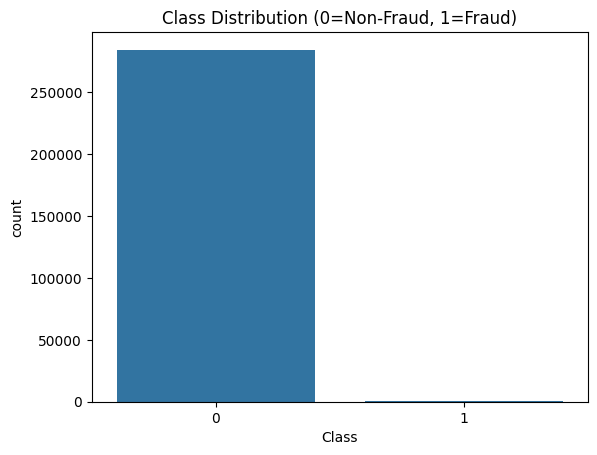


Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


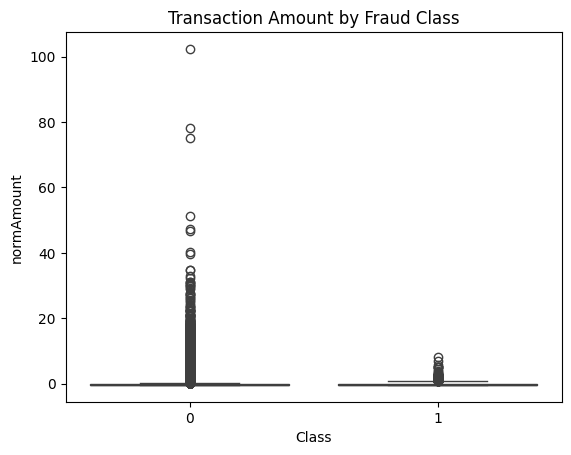

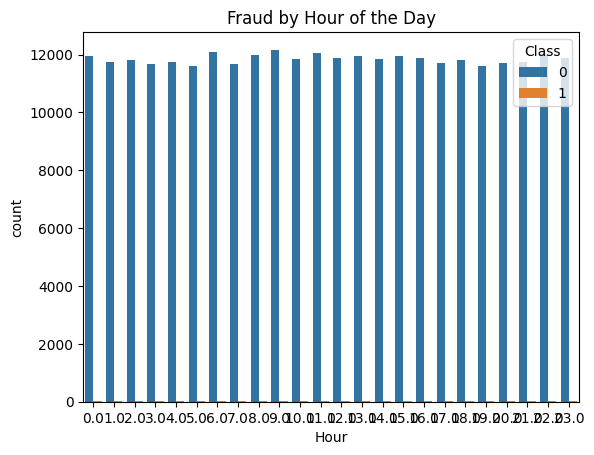

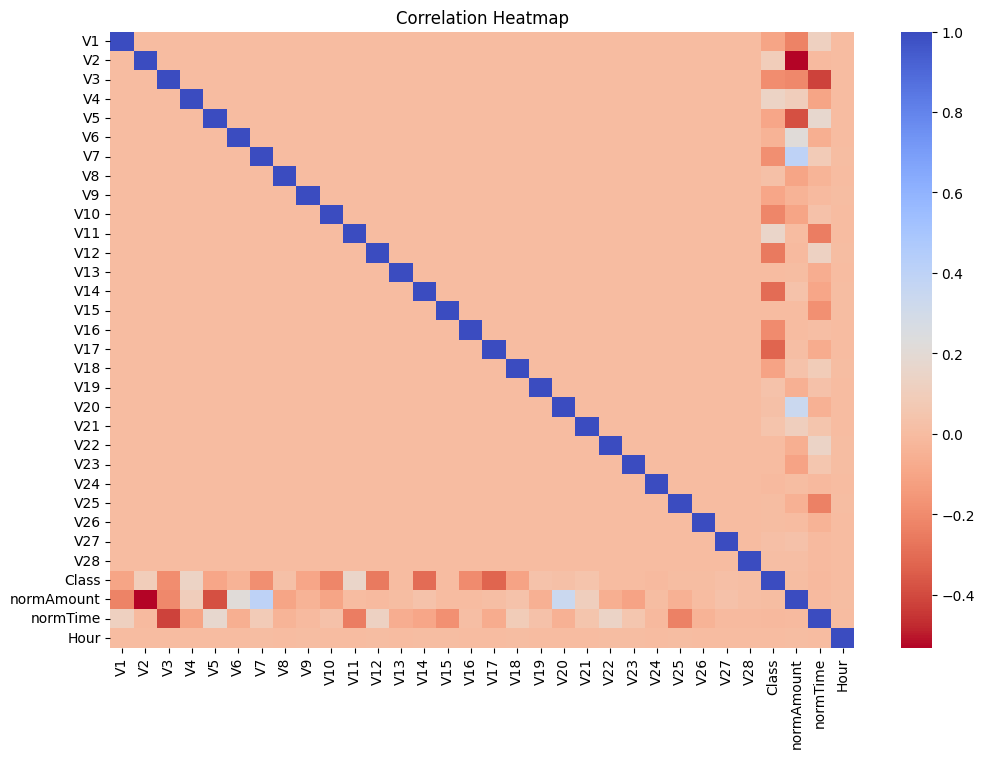


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56851    13]
 [   36    62]]
ROC AUC Score: 0.9579230573771434

Descriptive Logistic Regression Evaluation:

Precision for class 1 (fraud) ~0.83 means out of all predicted frauds, 83% were actually fraud.

Recall for class 1 ~0.63 means it correctly detects 63% of actual frauds — not perfect but decent given the imbalance.

F1-score ~0.72 balances precision and recall.

Support: 98 fraud cases in test, 56864 non-fraud.

Accuracy ~1.00 — high, but expected due to class imbalance (most transactions are non-fraud).

Confusion Matrix shows most non-fraud correctly identified (56851), 13 false positives, 36 false negativ

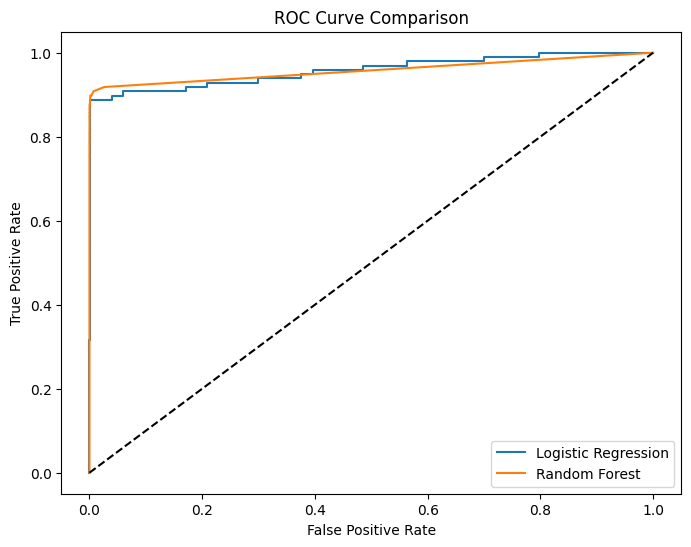

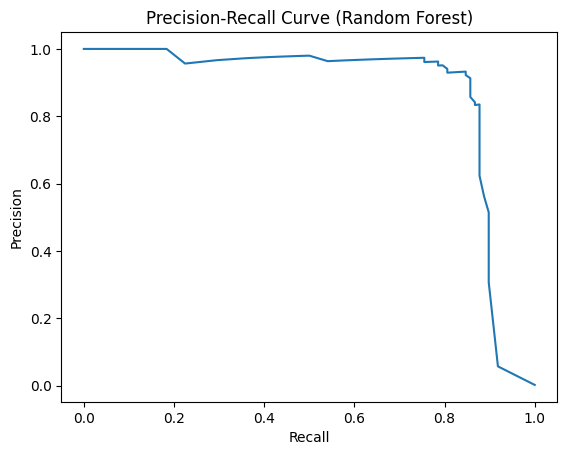

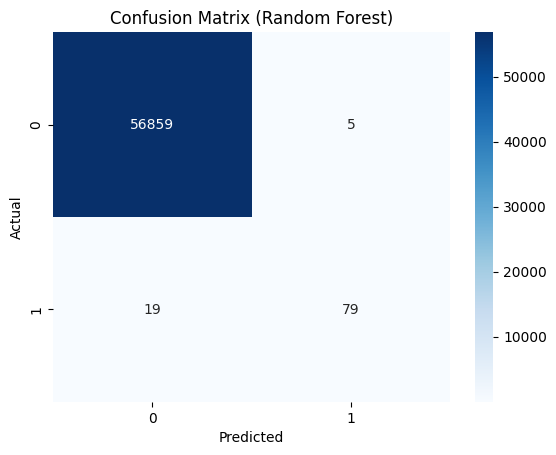

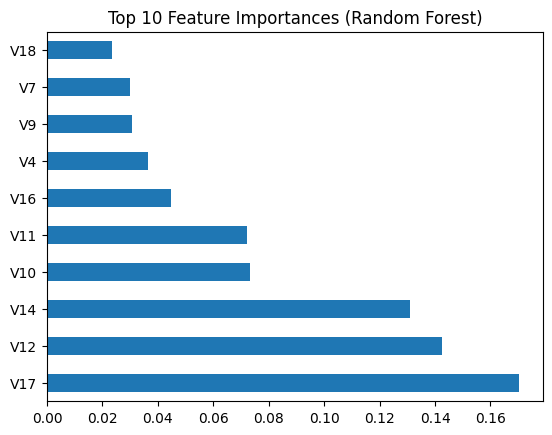


SUMMARY:
• Dataset is highly imbalanced (fraudulent transactions ≈ 0.17%)
• Both Logistic Regression and Random Forest performed well with ROC AUC > 0.90
• Random Forest showed better recall — critical for fraud detection
• Precision-Recall curve and confusion matrix give better insights for imbalanced data
• Top features (V-values) identified by Random Forest can inform further feature engineering


In [3]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)

# 2. Load Dataset
data = pd.read_csv("creditcard.csv")
print("Dataset Loaded. Shape:", data.shape)

# 3. Initial Exploration
print(data.head())
print(data.info())
print(data.describe())

# 4. Check Class Distribution
fraud_count = data['Class'].value_counts()
print("\nClass Distribution:\n", fraud_count)
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0=Non-Fraud, 1=Fraud)')
plt.show()

# 5. Missing Values
print("\nMissing Values:\n", data.isnull().sum())

# 6. Data Preprocessing
scaler = StandardScaler()
data['normAmount'] = scaler.fit_transform(data[['Amount']])
data['normTime'] = scaler.fit_transform(data[['Time']])
data.drop(['Time', 'Amount'], axis=1, inplace=True)

# 7. Transaction Amount Analysis by Class
sns.boxplot(x='Class', y='normAmount', data=data)
plt.title("Transaction Amount by Fraud Class")
plt.show()

# 8. Time-Based Fraud Pattern (Hour of the day)
data['Hour'] = (data['normTime'] * data.shape[0] * 30) // 3600 % 24
sns.countplot(x='Hour', hue='Class', data=data)
plt.title("Fraud by Hour of the Day")
plt.show()

# 9. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap="coolwarm_r", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# 10. Train-Test Split
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 11. Model 1: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

print("\n--- Logistic Regression ---")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_lr))

# --- Custom Descriptive Results for Logistic Regression ---
report = classification_report(y_test, y_pred_lr, output_dict=True)
precision_1 = report['1']['precision']
recall_1 = report['1']['recall']
f1_1 = report['1']['f1-score']
support_1 = report['1']['support']
support_0 = report['0']['support']
accuracy = (y_pred_lr == y_test).mean()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

print(f"\nDescriptive Logistic Regression Evaluation:\n")
print(f"Precision for class 1 (fraud) ~{precision_1:.2f} means out of all predicted frauds, {precision_1*100:.0f}% were actually fraud.\n")
print(f"Recall for class 1 ~{recall_1:.2f} means it correctly detects {recall_1*100:.0f}% of actual frauds — not perfect but decent given the imbalance.\n")
print(f"F1-score ~{f1_1:.2f} balances precision and recall.\n")
print(f"Support: {support_1:.0f} fraud cases in test, {support_0:.0f} non-fraud.\n")
print(f"Accuracy ~{accuracy:.2f} — high, but expected due to class imbalance (most transactions are non-fraud).\n")
print(f"Confusion Matrix shows most non-fraud correctly identified ({tn}), {fp} false positives, {fn} false negatives, {tp} true positives.\n")
print(f"ROC AUC ~{roc_auc:.3f} — strong overall classification power.\n")

# 12. Model 2: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("\n--- Random Forest ---")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

# 13. ROC Curve Comparison
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# 14. Precision-Recall Curve (Random Forest)
precision, recall, _ = precision_recall_curve(y_test, y_proba_rf)
plt.plot(recall, precision)
plt.title("Precision-Recall Curve (Random Forest)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# 15. Confusion Matrix as Heatmap (Random Forest)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 16. Feature Importance (Random Forest)
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

# 17. Summary
print("\nSUMMARY:")
print("• Dataset is highly imbalanced (fraudulent transactions ≈ 0.17%)")
print("• Both Logistic Regression and Random Forest performed well with ROC AUC > 0.90")
print("• Random Forest showed better recall — critical for fraud detection")
print("• Precision-Recall curve and confusion matrix give better insights for imbalanced data")
print("• Top features (V-values) identified by Random Forest can inform further feature engineering")
